In [258]:
# Version 1.2
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import re #Module expressions régulières pour modifier certaines colones

## Partie 1 : Analyse des données

### Ouverture

In [259]:
#laptop_data = pd.read_csv(r'laptops.csv', sep=",", index_col=12, encoding='latin1') #J'ai modifié l'index pour la mettre sur le prix
laptop_data = pd.read_csv('laptops.csv', sep=",", encoding='latin1')

#### Suppression des colones inexploitables et autres premières modifs

In [260]:
#Suppression des colonnes inutiles
laptop_data = laptop_data.drop('Model Name', axis=1)
laptop_data = laptop_data.drop('Operating System Version', axis=1) 

laptop_data.rename(columns = {'Screen Size':'ScreenSize'}, inplace = True) # Suppression de l'espace dans le nom de la colonne

laptop_data['Price (Euros)'] = laptop_data['Price (Euros)'].str.replace(',', '.').astype('float64') # Convertir les prix en float64

In [261]:
laptop_data.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Euros)
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [262]:
laptop_data.shape

(1303, 11)

In [263]:
laptop_data.dtypes

Manufacturer         object
Category             object
ScreenSize           object
Screen               object
CPU                  object
RAM                  object
 Storage             object
GPU                  object
Operating System     object
Weight               object
Price (Euros)       float64
dtype: object

In [264]:
#laptop_data.loc['Dell']
laptop_data["Price (Euros)"].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price (Euros), dtype: float64

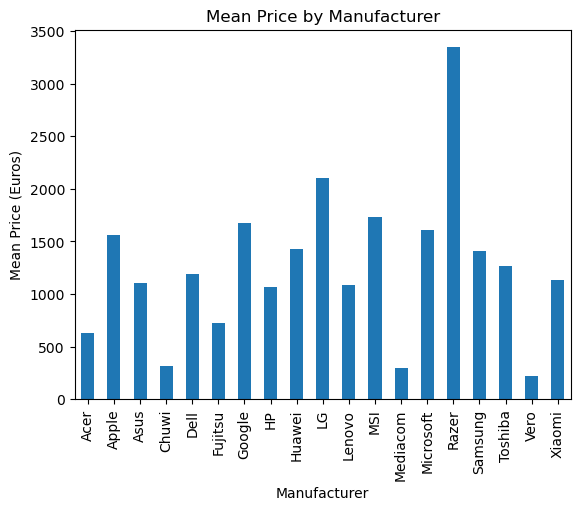

In [265]:
# group the data by manufacturer and calculate the mean price for each group
manufacturer_mean_price = laptop_data.groupby('Manufacturer')['Price (Euros)'].mean()

# plot the mean price by manufacturer
manufacturer_mean_price.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price (Euros)')
plt.title('Mean Price by Manufacturer')
plt.show()

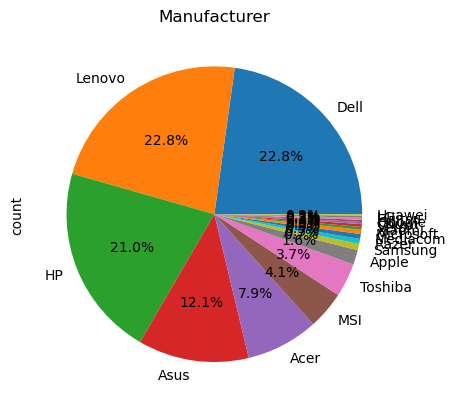

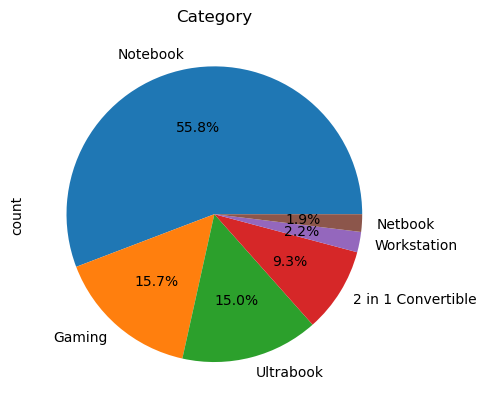

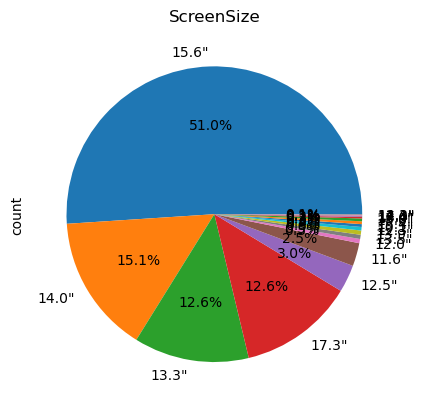

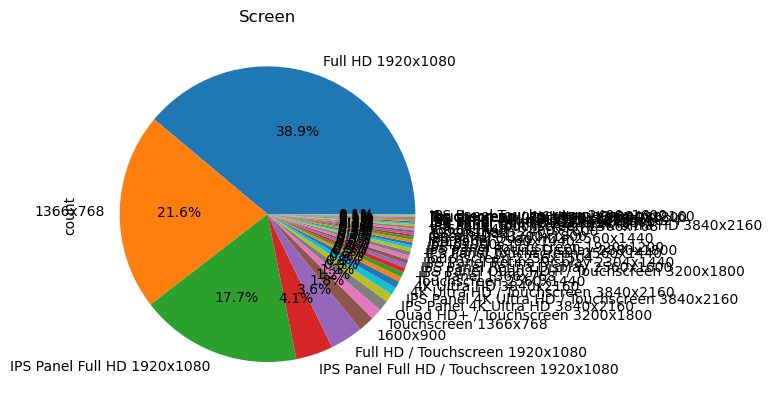

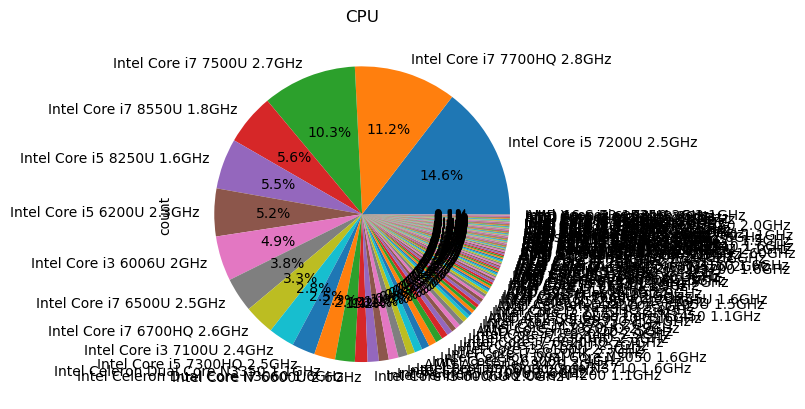

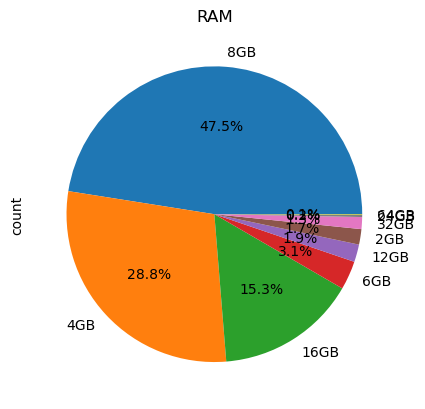

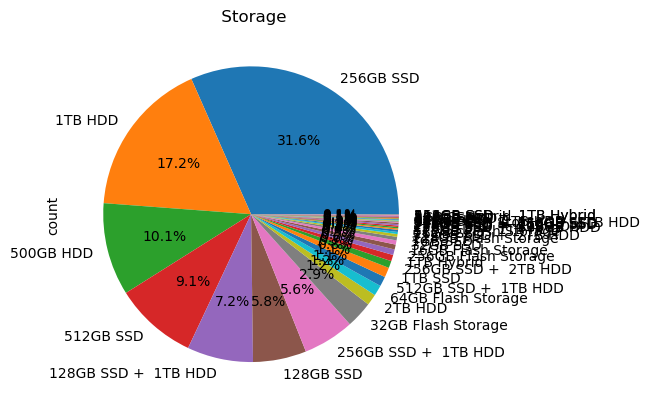

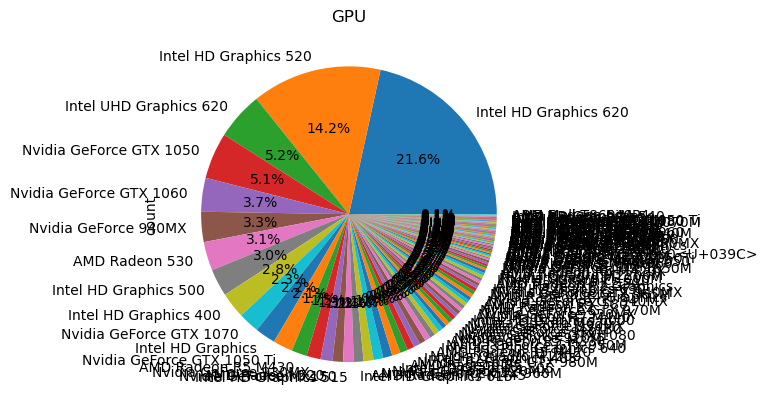

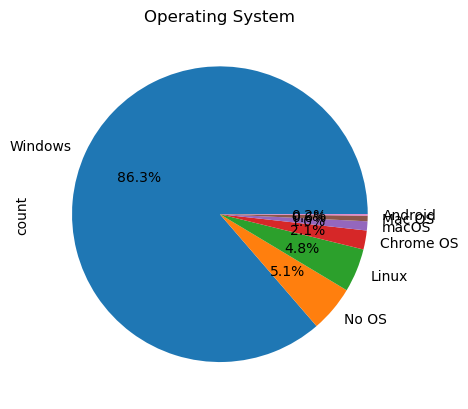

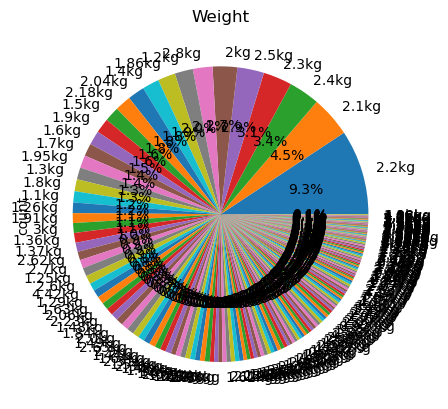

In [266]:
for column in laptop_data.columns:
   if column != 'Price (Euros)':
      laptop_data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
      plt.title(column)
      plt.show()

# Peut-être refaire celles avec beaucoup de données séparément, en ne mettant que les 10 plus présentes

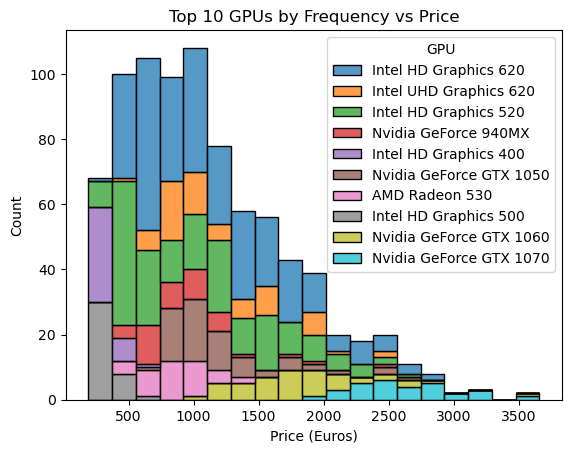

In [267]:
# get the top 10 most common GPUs
top_10_gpus = laptop_data['GPU'].value_counts().head(10).index.tolist()

# filter the dataframe to only include the top 10 GPUs
laptop_data_top_10_gpus = laptop_data[laptop_data['GPU'].isin(top_10_gpus)]

# create a histogram of GPU vs Price
sns.histplot(data=laptop_data_top_10_gpus, x='Price (Euros)', hue='GPU', multiple='stack')
plt.title('Top 10 GPUs by Frequency vs Price')
plt.show()

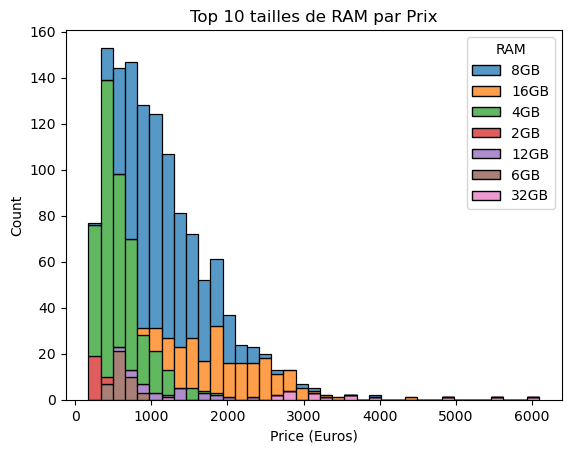

In [268]:
# get the frequency of each RAM size
ram_counts = laptop_data['RAM'].value_counts()

# filter the dataframe to only include the RAM sizes with at least 10 occurrences
laptop_data_filtered_ram = laptop_data[laptop_data['RAM'].isin(ram_counts[ram_counts >= 10].index)]

# create a histogram of RAM vs Price
sns.histplot(data=laptop_data_filtered_ram, x='Price (Euros)', hue='RAM', multiple='stack')
plt.title('Top 10 tailles de RAM par Prix')
plt.show()

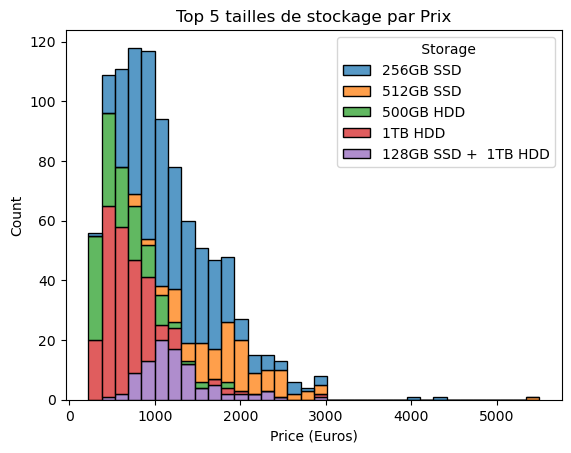

In [269]:
# get the frequency of each storage size
storage_counts = laptop_data[' Storage'].value_counts()

# filter the dataframe to only include the top 5 storage sizes by frequency
top_5_storage = storage_counts.head(5).index.tolist()
laptop_data_filtered_storage = laptop_data[laptop_data[' Storage'].isin(top_5_storage)]

# create a histogram of storage vs Price
sns.histplot(data=laptop_data_filtered_storage, x='Price (Euros)', hue=' Storage', multiple='stack')
plt.title('Top 5 tailles de stockage par Prix')
plt.show()

On constate déjà que la majorité des ordinateurs sont des notebooks. Ensuite, nous avons 15% d'ordinateurs de jeu, 15% d'Ultrabook, 10% d'ordinateurs convertibles et une minorité de Workstations et de Netbook.
Le prix moyen des ordinateurs est de 1123€ avec une médiane à 977€.

Au niveau des prix moyens par rapport au constructeur, on constate que Razer est de loin la marque la plus chère, normal puisque c'est une marque d'ordinateurs de jeu, nécéssitant les composants les plus chers. Nous avons ensuite les PC de LG et de MSI/Google. Les ordinateurs les moins chers du lot sont les Chuwi, les Mediacom et les Vero.

Au niveau de la taille d'écran, la majorité sont de 15,6", qui semble être la norme de nos jours.
De même, la majorité sont en Full HD, et 17% sont en IPS.

Pour les CPU, malgré la très grande diversité, 15% d'entre eux sont des Intel core i5-7200U
Pour la RAM, la majorité des PC ont 8GB. Ce dataset datant d'il y a au moins 4 ans, la norme n'était pas encore de 16GB.
Pour le stockage, 31% des PC ont 256Gb de SSD et 17% ont 1TB de HDD mais seuls 5% ont les deux en même temps.
Près d'1/3 des PC ont uniquement le processeur graphique intégré au CPU. De plus, plus on monte en prix de cartes graphiques dédiées, moins il y a de PC qui en ont.
90% des PC sont sous Windows, cohérant car on a une minorité de produits Apple et de Chromebook dans notre dataset

Quant au poids, 10% des PC font 2.2Kg.


## Partie 2 : Quantification du dataset

In [270]:
laptop_data['ID'] = range(1, len(laptop_data) + 1)

#### On convertit les valeurs de la catégorie et de l'OS en chiffre

In [271]:
print((laptop_data['Category'].unique()))

laptop_data.Category[laptop_data.Category == 'Ultrabook'] = 1
laptop_data.Category[laptop_data.Category == 'Notebook'] = 2
laptop_data.Category[laptop_data.Category == 'Netbook'] = 3
laptop_data.Category[laptop_data.Category == 'Gaming'] = 4
laptop_data.Category[laptop_data.Category == '2 in 1 Convertible'] = 5
laptop_data.Category[laptop_data.Category == 'Workstation'] = 6

laptop_data.rename(columns = {'Operating System':'OperatingSystem'}, inplace = True)
print((laptop_data['OperatingSystem'].unique()))

laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'macOS'] = 1
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'No OS'] = 2
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Windows'] = 3
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Mac OS'] = 4
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Linux'] = 5
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Android'] = 6
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Chrome OS'] = 7

print((laptop_data['Manufacturer'].unique()))

laptop_data.Manufacturer[laptop_data.Manufacturer== 'Apple'] = 1
laptop_data.Manufacturer[laptop_data.Manufacturer== 'HP'] = 2
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Acer'] = 3
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Asus'] = 4
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Dell'] = 5
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Lenovo'] = 6
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Chuwi'] = 7
laptop_data.Manufacturer[laptop_data.Manufacturer== 'MSI'] = 8
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Microsoft'] = 9
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Toshiba'] = 10
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Huawei'] = 11
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Xiaomi'] = 12
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Vero'] = 13
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Razer'] = 14
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Mediacom'] = 15
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Samsung'] = 16
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Google'] = 17
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Fujitsu'] = 18
laptop_data.Manufacturer[laptop_data.Manufacturer== 'LG'] = 19

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
['macOS' 'No OS' 'Windows' 'Mac OS' 'Linux' 'Android' 'Chrome OS']
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


C:\Users\Louis\AppData\Local\Temp\ipykernel_11120\3230875271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data.Category[laptop_data.Category == 'Ultrabook'] = 1
C:\Users\Louis\AppData\Local\Temp\ipykernel_11120\3230875271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data.Category[laptop_data.Category == 'Notebook'] = 2
C:\Users\Louis\AppData\Local\Temp\ipykernel_11120\3230875271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

#### Attribution des numéros pour les marques

In [272]:
gpu_mapping = {} 
gpu = laptop_data['GPU'].unique()
cpu_mapping = {}
cpu = laptop_data['CPU'].unique()

for i, gpu in enumerate(gpu, start=1):
    gpu_mapping[gpu] = i

for i, cpu in enumerate(cpu, start=1):
    cpu_mapping[cpu] = i

laptop_data['GPU'] = laptop_data['GPU'].map(gpu_mapping)

laptop_data['CPU'] = laptop_data['CPU'].map(cpu_mapping)


#### Transformation de certaines colones

In [273]:
#On supprime les unités à la fin de la colone Weight, Screen Size et RAM
laptop_data['Weight'] = laptop_data['Weight'].str.replace('kg', '').str.replace('s', '').astype(float)

laptop_data['ScreenSize'] = laptop_data['ScreenSize'].str.replace('"', '').astype(float)

laptop_data['RAM'] = laptop_data['RAM'].str.replace('GB', '').str.replace('s', '').astype(float)

#Pour la colone ScreenSize, on supprime tout ce qu'il y a avant la taille avec re (module d'expressions régulières)
laptop_data['Screen'] = laptop_data['Screen'].apply(lambda x: re.findall('\d{4}x\d{4}|\d{4}x\d{3}', x)[0] if isinstance(x, str) else x)
#Ensuite on sépare la première taille de la deuxième
laptop_data['Screen'] = laptop_data['Screen'].str.split('x', n=1)
#Ensuite on fait la multiplication afin d'avoir un seul chiffre
laptop_data['Screen'] = laptop_data['Screen'].apply(lambda x: int(x[0]) * int(x[1]) if isinstance(x, list) and len(x) == 2 else x)

In [274]:
print (laptop_data[' Storage'].unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '1GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '512GB SSD +  1TB Hybrid' '256GB SSD +  1TB Hybrid']


In [275]:
laptop_data[' StorageType'] = laptop_data[' Storage'].str.replace('.*GB', '', regex=True)
print (laptop_data[' StorageType'].unique())

[' SSD' ' Flash Storage' ' HDD' '1TB HDD' ' SSD +  1TB HDD'
 ' SSD +  2TB HDD' '2TB HDD' '1TB Hybrid' '1TB SSD'
 ' Flash Storage +  1TB HDD' '1TB HDD +  1TB HDD' '1TB SSD +  1TB HDD'
 ' Hybrid' ' SSD +  1TB Hybrid']


In [276]:
storagetype_mapping = {} 
storagetype = laptop_data[' StorageType'].unique()

for i, storage in enumerate(storagetype, start=1):
    storagetype_mapping[storage] = i

laptop_data[' StorageType'] = laptop_data[' StorageType'].map(storagetype_mapping)

In [277]:
Storage_mapping = {
    '256GB SSD': 256,
    '1TB HDD': 1000,
    '500GB HDD': 500,
    '512GB SSD': 512,
    '128GB SSD +  1TB HDD': 128 + 1000,
    '128GB SSD': 128,
    '256GB SSD +  1TB HDD': 256 + 1000,
    '32GB Flash Storage': 32,
    '2TB HDD': 2000,
    '64GB Flash Storage': 64,
    '512GB SSD +  1TB HDD': 512 + 1000,
    '1TB SSD': 1000,
    '256GB SSD +  2TB HDD': 256 + 2000,
    '1TB Hybrid': 1000,
    '256GB Flash Storage': 256,
    '16GB Flash Storage': 16,
    '32GB SSD': 32,
    '1GB SSD': 1,
    '128GB Flash Storage': 128,
    '512GB SSD +  2TB HDD': 512 + 2000,
    '16GB SSD': 16,
    '128GB SSD +  2TB HDD': 128 + 2000,
    '1TB SSD +  1TB HDD': 1000 + 1000,
    '256GB SSD +  500GB HDD': 256 + 500,
    '512GB Flash Storage': 512,
    '256GB SSD +  256GB SSD': 256 + 256,
    '512GB SSD +  512GB SSD': 512 + 512,
    '8GB SSD': 8,
    '64GB Flash Storage +  1TB HDD': 64 + 1000,
    '256GB SSD +  1TB Hybrid': 256 + 1000,
    '128GB HDD': 128,
    '1TB HDD +  1TB HDD': 1000 + 1000,
    '240GB SSD': 240,
    '32GB HDD': 32,
    '64GB SSD': 64,
    '512GB SSD +  1TB Hybrid': 512 + 1000,
    '508GB Hybrid': 508,
    '512GB SSD +  256GB SSD': 512 + 256
}

laptop_data[' Storage'] = laptop_data[' Storage'].replace(Storage_mapping)

In [278]:
#laptop_data['Weight'] = laptop_data['Weight'].astype(int)

In [282]:
laptop_data.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,OperatingSystem,Weight,Price (Euros),ID,StorageType
0,1,1,13.3,4096000,1,8.0,128,1,1,1.37,1339.69,1,1
1,1,1,13.3,1296000,2,8.0,128,2,1,1.34,898.94,2,2
2,2,2,15.6,2073600,3,8.0,256,3,2,1.86,575.00,3,1
3,1,1,15.4,5184000,4,16.0,512,4,1,1.83,2537.45,4,1
4,1,1,13.3,4096000,5,8.0,256,5,1,1.37,1803.60,5,1


In [280]:
laptop_data_pairplot = laptop_data.apply(lambda x: pd.to_numeric(x, errors='coerce'))
#sns.pairplot(laptop_data)


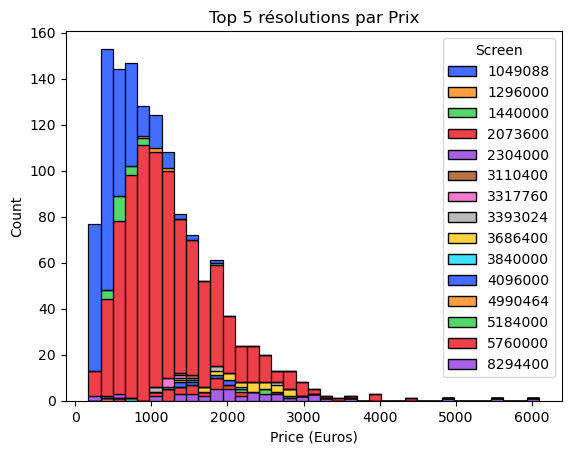

In [284]:
sns.histplot(data=laptop_data, x='Price (Euros)', hue='Screen', multiple='stack', palette='bright')
plt.title('Top 5 résolutions par Prix')
plt.show()

Rouge = 1920*1080, bleu = 1366*768.